# 4章　ニューラルネットワークの学習

ここでは学習とは訓練データから最適な重みパラメータの値を自動的に獲得することを指す。

## 4.1 データから学習する
ニューラルネットワークはデータから学習できる特徴がある。これは多数の重みパラメータを人力で設定する必要がなくなるため、有用である。

### 4.1.1 データ駆動
人にとって分かる規則性でもアルゴリズムで実現しようとすると難しい。アルゴリズムの考案ではなく、画像空特徴量を抽出したえパターンを学習させることで実現する。特徴量とはデータから重要なデータを的確に抽出できるように設計した変換器のことである。
画像の特徴量は通常、ベクトルとして記述される。(コンピュータビジョン分野ではSIFTやSURF、HOGなどが挙げられる)。それらの特徴量を使って画像データをベクトルに変換し、機械学習で用いる識別器で学習を行なう。

アルゴリズムを考える代わりに、問題に応じて適した特徴量を持ちいらなければ良い結果は得られない。(人の手によって特徴量を考える必要がある可能性)
人力においても、機械学習と特徴量によるアプローチも人の手が介在していたが、ディープラーニングでは特徴量の選択自体も機械が学習を行なう。(「5」の認識であっても、「犬」の認識であってもアプローチ方法は変わらない)

ニューラルネットワークは、対象とする問題に関係なくデータをそのまま生データとして「end-to-end」学習することができる。(生データの入力で目的の結果出力まで得られる)


### 4.1.2 訓練データとテストデータ
機械学習の問題では作成したモデルの汎化能力を正しく評価したい。そのため訓練データ(教師データ)とテストデータを分離する。一つのデータセットだけで学習、評価を行なうとそのデータセットにしか対応できていないものの良い結果が得られたと誤認してしまう。特定のデータセットのみにだけ過度に適合した状態を過学習(overfitting)と呼ぶ。必ず避けなければ行けない状態。


## 4.2 損失関数

ニューラルネットワークの学習ではある指標で現在の状態を表す。損失関数(loss function)と呼ばれ、この指標を基準として最適な重みの探索を行なう。関数は任意のものが用いられるが、一般的には二乗和誤差や交差エントロピー誤差が用いられる。
損失関数は教師データからどれだけ逸れているかを表す指標であり、小さくなればなるほど良い性能を示していると言える。

### 4.2.1 二乗和誤差
二乗和誤差は以下式で表される。

$$
E = \frac{1}{2}\sum(y_{k}-t_{k})^{2}
$$

$y_{k}$はニューラルネットワークの出力データ、$t_{k}$は教師データ、$k$はデータの次元数を表す。

出力データはソフトマックス関数のの出力であり、確率と同義である。教師データは正解データのみ「1」、それ以外は「0」で格納されており「one-hot表現」と呼ばれる。



In [5]:
# 2乗和誤差の実装
import numpy as np


def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

# 「2」が正解
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 「2」であると推定する場合(誤差が小さい)
y_2 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

print(mean_squared_error(np.array(y_2), np.array(t)))


# 「7」であると推定する場合(誤差が大きい)
y_7 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

print(mean_squared_error(np.array(y_7), np.array(t)))

0.0975
0.5975


### 4.2.2 交差エントロピー誤差

損失関数として交差エントロピー誤差(cross entropy error)も多く用いられる。

$$
E = -\sum_{k}t_{k}log\;y_{k}
$$

logは体がeの自然対数($log_{e}$)を表す。$y_{k}$はニューラルネットワークの出力、$t_{k}$は正解ラベルとする(one-hot表現)。そのため、実質的には正解ラベルが1に対応する出力の自然対数のみを計算する。(正解ラベルのネットワーク出力が0.6の場合-log0.6=0.51、0.1の場合-log0.1=2.30)



/Users/smap3/PycharmProjects/exercise_of_deep_larning_from_scratch/env/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/Users/smap3/PycharmProjects/exercise_of_deep_larning_from_scratch/env/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


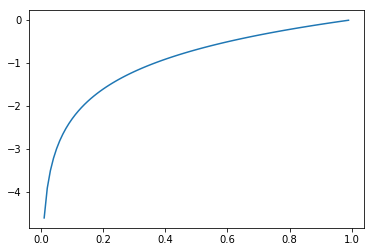

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# データの作成
x = np.arange(0, 1.0, 0.01)
y = np.log(x)

plt.plot(x, y)
plt.show()

自然対数をプロットすると上図のようになる。xが1の時にyが0となる。
よって確率が上がれば上がるほど、誤差である自然対数は0に近づく。

交差エントロピーを実装すると以下となる。
np.logの計算時に微小値であるdeltaを加算している。np.log(0)の場合において無限小(-inf)となりエラーになることを防ぐためである。

In [25]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

# 「2」が正解
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 「2」であると推定する場合(誤差が小さい)
y_2 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y_2), np.array(t)))

# 「7」であると推定する場合(誤差が大きい)
y_7 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y_7), np.array(t)))

0.510825457099
2.30258409299


### 4.2.3 ミニバッチ学習
これまで算出した損失関数は一つの訓練データについて求めて、できるだけ小さくするようにパラメータを探そうとしていた。実際の学習では全ての訓練データを対象として損失関数を求め、パラメータを算出する必要がある。交差エントロピーの場合は以下式。($t_{nk}$はn個目のデータのk次元目の値を意味する。)

$$
E = - \frac{1}{N} \sum_{n}\sum_{k}t_{nk} log \;y_{nk}
$$

Nで割るのは訓練データ全ての平均誤差を算出するためであり、データ数に関係なく統一した指標として用いるためである。

しかし、大量の訓練データの場合は計算に時間がかかってしまうため、データの中から一部を選び出して全体の近似として利用する。このような学習方法を「ミニバッチ学習」という。





In [38]:
# ミニバッチ法の実装
import sys, os
sys.path.append(os.pardir)
import numpy as np
from src.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)


# 訓練データをランダムに10枚抜き出す
train_size = x_train.shape[0]
batch_size = 10

# ミニバッチとして選出するインデックスを配列として取得
batch_mask = np.random.choice(train_size, batch_size)

x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print(x_batch.shape)
print(t_batch.shape)

# 選出したインデックスの配列
print(batch_mask)

(60000, 784)
(60000, 10)
(10, 784)
(10, 10)
[12834 10781 37939 21439 40024 11118 27697 25948  8812 38193]


### 4.2.4 [バッチ対応版]交差エントロピー誤差の実装

バッチデータに対応した交差エントロピー誤差の実装



In [2]:
# 教師データがone-hot表現の場合
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = t.reshape(1, t.size)
    return -np.sum(t * np.log(y)) / batch_size


# 教師データがラベルの場合
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = t.reshape(1, t.size)
    return -np.sum(np.log(y[np.arange(batch_size)], t)) / batch_size



### 4.2.5 なぜ損失関数を設定するのか

なぜ認識精度を指標とせずに、損失関数を設定し精度を測るのか。それはニューラルネットワークの学習において、最適なパラメータを探索する際に損失関数を少なくするようにするためである。t探索においてはパラメータの微分(勾配)を計算し、値を手がかりにパラメータの値を徐々に更新していく。

認識精度では殆どの場所で微分した結果が0になってしまい更新できない。具体的には認識性能32%で合った状態からパラメータを少し変更しても認識性能が32%のままである可能性がある(認識精度はパラメータの微小な変化には反応せず、反応した場合は急に変わる可能性があるため更新の方向が分からない)。これはステップ関数にも同じ事が言える。
一方シグモイド関数はいずれの箇所をとっても微分が0になる箇所が無く、連続的に変化している。

## 4.3 数値微分

勾配とはどういうものか、どういう性質があるのかを説明する。


### 4.3.1 微分

単位時間あたりにどれだけ変化があったのかは「平均」として表す事が出来る(時速など)。一方「微分」はその瞬間の変化量を表すものである(1時間→1分→1秒→…としていく)。数式では以下で表される。
(左辺は$f(x)$のxについての微分を表す。)

$$
\frac{df(x)}{dx} = lim_{h→0}\frac{f(x+h)-f(x)}{h}
$$


Python実装中における微分を行なう上での工夫点

* 変化量$h$の設定方法

丸め誤差に留意する必要がある(1e-50など小さすぎる値ま丸められる)。$10^{-4}$くらいなら良い。

* 数値微分を行なう際の誤差軽減

上記式で微分を行なう際には真の接線ではなく、$x$と$x+h$の間の傾きを求めている(数値微分:numerical differentiation⇔数式的に展開して解析的に解く)ために誤差が生じる。
誤差を減らす工夫として$(x+h)$と$(x-h)$の差分を計算する。この手法は「中心差分」と呼ばれる。


これらの工夫を加えた実装は以下。


In [3]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

### 4.3.2 数値微分の例

以下式を微分してみる。

$ y = 0.01x^{2}+0.1x$


/Users/smap3/PycharmProjects/exercise_of_deep_larning_from_scratch/env/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


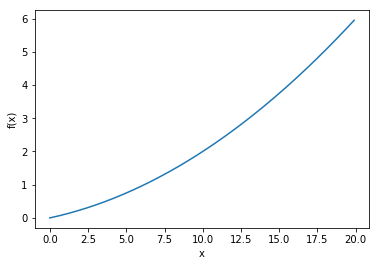

In [6]:
def function_1(x):
    return 0.01*x**2 + 0.1*x


import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [8]:
print(numerical_diff(function_1, 5))

print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


0.1999999999990898


/Users/smap3/PycharmProjects/exercise_of_deep_larning_from_scratch/env/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


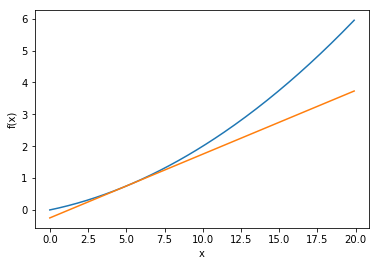

In [10]:
# 数値微分における傾きの確認

def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

### 4.3.3 偏微分

以下式のような2変数の場合の微分を行なう。

$f(x0,x1) = x^{2}_{0} + x^{2}_{1}$


In [ ]:
def function_2(x):
    return x[0]**2 + x[1]**2

